In [ ]:
%%html
<marquee style='width:100%; color: blue;' behavior="alternate", direction="right" scrollamount="20"><b> <h1 style="color:#0082FC;font-family:Candara;">Seoul Bike Sharing Demand Prediction(Supervised ML-Regression) </h1></b></marquee>

## Importing the Dataset and Required Modules and Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/SeoulBikeData.csv", encoding= 'unicode_escape')

## EDA of the Dataset

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.describe().T.style.background_gradient()

In [ ]:
data['Rented Bike Count'].value_counts().sum()

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.corr().style.background_gradient()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
Rented Bike Count,1.000000,0.410257,0.538008,-0.199780,0.150074,0.199280,0.372139,0.310649,-0.213277,-0.185888,-0.253058,0.072338,0.203943,0.046849,0.070861,0.215162
Hour,0.410257,1.000000,0.123973,-0.241644,0.300129,0.098753,0.003633,0.189647,-0.025475,-0.032034,-0.000000,0.000000,0.005439,0.000000,0.000000,0.000000
Temperature(°C),0.538008,0.123973,1.000000,0.161753,-0.015890,0.031122,0.912343,0.318595,0.075267,-0.335809,-0.340459,0.055329,-0.051157,0.081495,0.050046,0.378571
Humidity(%),-0.199780,-0.241644,0.161753,1.000000,-0.345628,-0.543090,0.528687,-0.459183,0.400177,0.051021,-0.120310,0.050278,-0.020800,0.007047,0.047798,0.035925
Wind speed (m/s),0.150074,0.300129,-0.015890,-0.345628,1.000000,0.171218,-0.152456,0.366072,-0.049251,0.037149,0.101907,-0.016649,0.010122,-0.050626,-0.081778,0.006202
Visibility (10m),0.199280,0.098753,0.031122,-0.543090,0.171218,1.000000,-0.156225,0.139593,-0.258518,-0.085578,-0.014776,-0.031773,-0.026000,-0.106859,0.077888,0.052381
Dew point temperature(°C),0.372139,0.003633,0.912343,0.528687,-0.152456,-0.156225,1.000000,0.071324,0.211389,-0.260299,-0.287513,0.067149,-0.043071,0.065047,0.061085,0.330824
Solar Radiation (MJ/m2),0.310649,0.189647,0.318595,-0.459183,0.366072,0.139593,0.071324,1.000000,-0.121689,-0.072002,-0.054799,0.008242,-0.005558,-0.004113,-0.019888,0.106167
Rainfall(mm),-0.213277,-0.025475,0.075267,0.400177,-0.049251,-0.258518,0.211389,-0.121689,1.000000,0.001522,-0.036346,0.012091,0.015776,-0.010718,-0.014773,0.035219
Snowfall (cm),-0.185888,-0.032034,-0.335809,0.051021,0.037149,-0.085578,-0.260299,-0.072002,0.001522,1.000000,0.239947,-0.007619,0.043083,0.099108,-0.000068,-0.232419


In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,center = 0, cmap="crest")
plt.show()

In [ ]:
data.groupby('Holiday').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index().style.background_gradient()

In [ ]:
data.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index().style.background_gradient()

In [ ]:
data.groupby('Holiday').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index().style.background_gradient()

In [ ]:
pd.plotting.scatter_matrix(data, figsize=(20, 20))
plt.show()

In [ ]:
data.hist(column = 'Rented Bike Count')
plt.show()

In [ ]:
hour = data["Hour"]
count = data["Rented Bike Count"]
fig = plt.figure(figsize =(10, 5))
sns.barplot(x=hour,y=count,hue="Holiday",data=data)
plt.xlabel("Hour")
plt.ylabel("Rented Bike Count")
plt.show()

In [ ]:
hour = data["Hour"]
count = data["Rented Bike Count"]
fig = plt.figure(figsize =(10, 5))
sns.barplot(x=hour,y=count,hue="Seasons",data=data)
plt.xlabel("Hour")
plt.ylabel("Rented Bike Count")
plt.show()

In [ ]:
hour = data[ "Hour"].head(23)
count = data["Rented Bike Count"].head(23)
fig = plt.figure(figsize =(10, 5))
plt.bar(hour,count)
plt.show()

In [ ]:
data.plot(kind='scatter', x='Temperature(°C)', y='Dew point temperature(°C)', alpha = 0.5)
plt.show()

In [ ]:
data.plot(kind='scatter', x='Temperature(°C)', y='Rented Bike Count', alpha = 0.5)
plt.show()

## Feature Engineering Methods

### *Converting Date feature into Pandas Date*

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Day']= data['Date'].dt.day
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year
data.head()

<ipython-input-5-11227884af4b>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [ ]:
data = data.drop(["Date"], axis = 1)

### *Ordinal Encoding*

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordEncoder = OrdinalEncoder()
cat_data = data[["Seasons","Holiday","Functioning Day"]]
cat_data = ordEncoder.fit_transform(cat_data.values.reshape(-1,3))
cat_data = pd.DataFrame(cat_data)
data[["Seasons","Holiday","Functioning Day"]] = cat_data
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3.0,1.0,1.0,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3.0,1.0,1.0,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3.0,1.0,1.0,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3.0,1.0,1.0,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3.0,1.0,1.0,12,1,2017


In [ ]:
data["Holiday"].value_counts()

1.0    8328
0.0     432
Name: Holiday, dtype: int64

### *Power Transformation*



In [ ]:
from sklearn.preprocessing import PowerTransformer
var=list(data.select_dtypes(include=['int32','float64']).columns)
sc_X = PowerTransformer(method = 'yeo-johnson')
data[var] = sc_X.fit_transform(data[var])

### *Feature Scaling (Standardization)*
##### Standardization: 𝐗' = (𝐗 - μ) / σ

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data)
transform_data = sc.transform(data)
X_std = data.drop(["Rented Bike Count"], axis=1)
y_std = data["Rented Bike Count"]
X_std.shape

(8760, 15)

### *Splitting data into X and y*

In [ ]:
X = data.drop(["Rented Bike Count", "Dew point temperature(°C)"], axis=1)

In [ ]:
X.head()

In [ ]:
y = data['Rented Bike Count']

In [ ]:
print(X.shape)
print(y.shape)

### *Train-Test Split*

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
## On Standard Scaling
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, test_size=0.2, random_state=42)

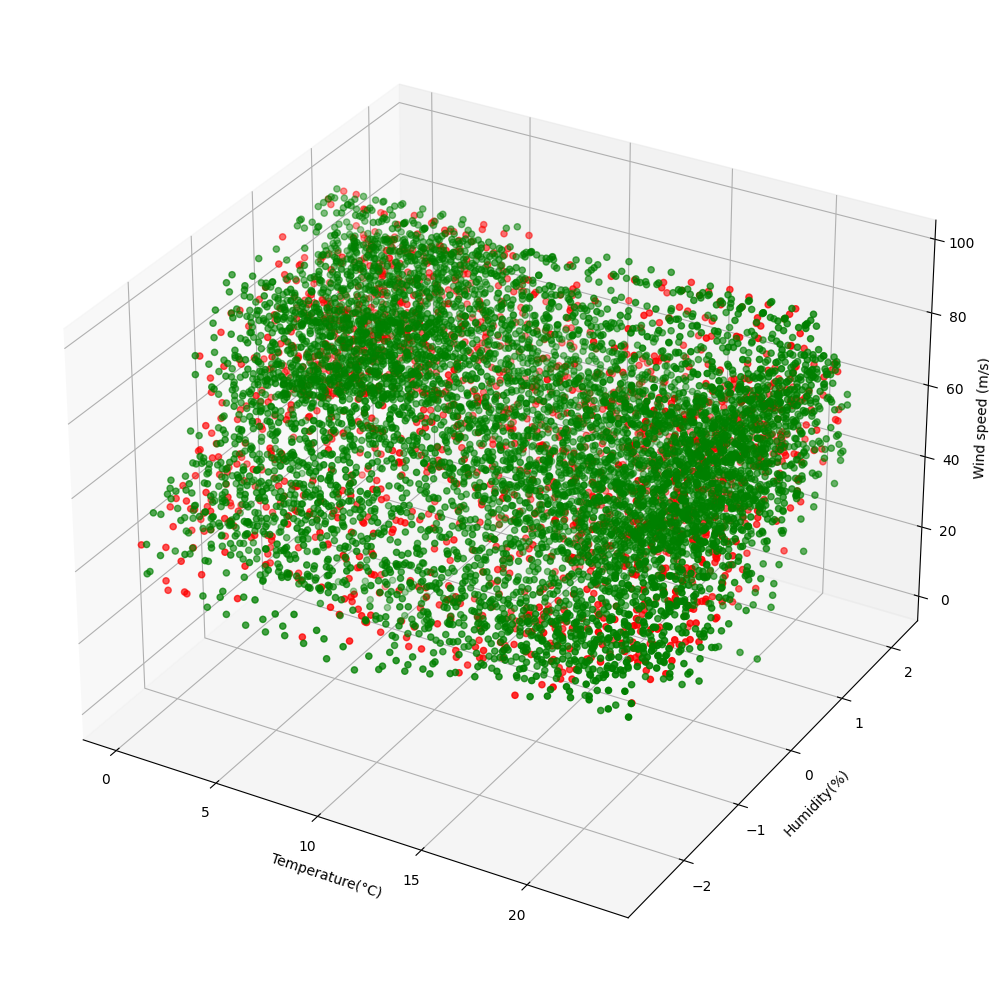

In [ ]:
## Visualizing Train-Test Split
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], X_train.iloc[:,2], color="g");
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], X_test.iloc[:,2], color="r");
ax.set_xlabel("Temperature(°C)")
ax.set_ylabel("Humidity(%)")
ax.set_zlabel("Wind speed (m/s)")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
X_2D_pca = pca2.fit_transform(X)

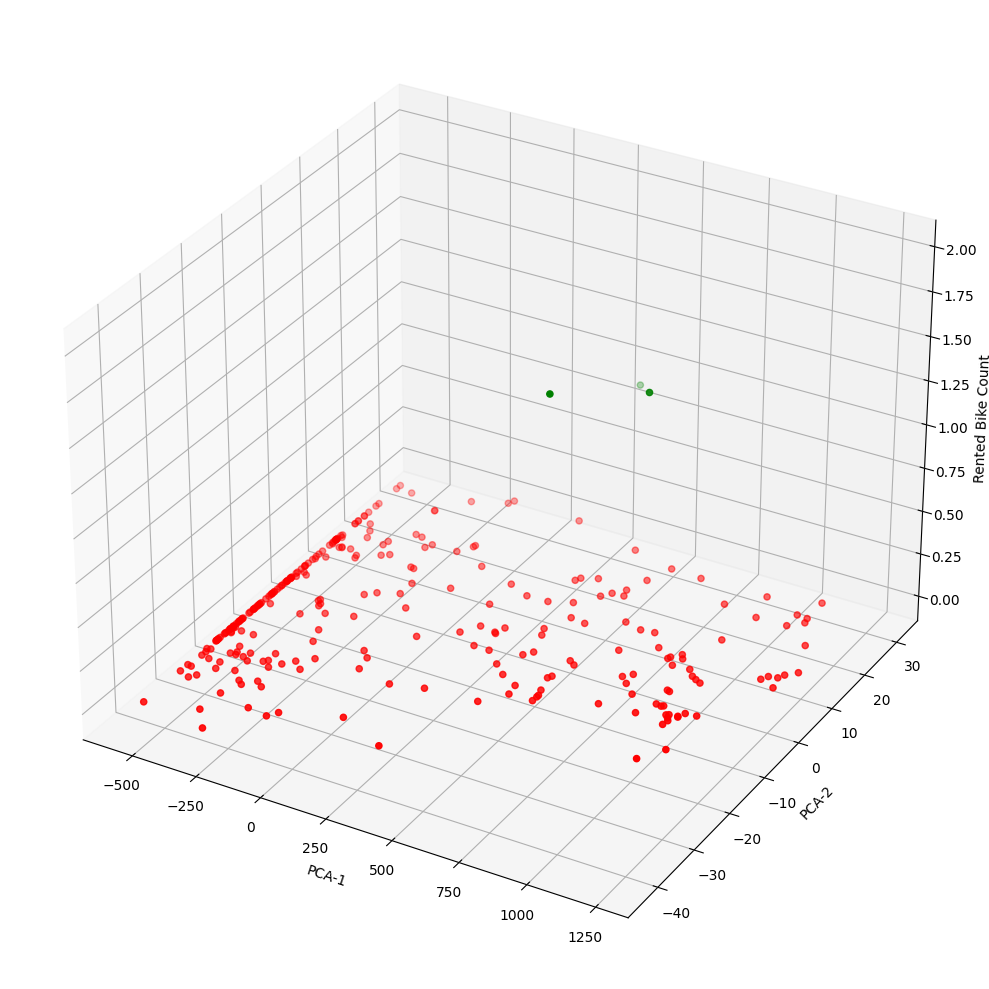

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_2D_pca[y==0,0], X_2D_pca[y==0,1], y[y==0], color="r");
ax.scatter(X_2D_pca[y==1,0], X_2D_pca[y==1,1], y[y==1], color="b");
ax.scatter(X_2D_pca[y==2,0], X_2D_pca[y==2,1], y[y==2], color="g");
ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Rented Bike Count")
plt.tight_layout()
plt.show()

# *Techniques Applied*

## *Linear Regression*

In [ ]:
## Linear Regression Without Standard Scaling
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
r2_Score = LR_model.score(X_test, y_test)
print(r2_Score)

0.5473867855588497


In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = LR_model.predict(X_test)
y_test.head()

6056    1728
5556     822
5990     658
7674    2716
3319    1083
Name: Rented Bike Count, dtype: int64

In [ ]:
## Linear Regression With Standard Scaling
from sklearn.linear_model import LinearRegression
LR_model_std = LinearRegression()
LR_model_std.fit(X_train_std, y_train)
r2_Score = LR_model_std.score(X_test_std, y_test)
print(r2_Score)

0.547439352296053


In [ ]:
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(LR_model, X_train, y_train, cv = 10)
print(scores_cv.mean())
print(scores_cv.std())

0.565695570912433
0.018314632343610502


In [ ]:
##Model Intercept and Coefficients
print(LR_model.intercept_)
print(LR_model.coef_)

## *Polynomial Regression*

In [ ]:
## Polynomial Regression Without Standard Scaling
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
poly_reg=PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
poly_model=LinearRegression()
poly_model.fit(X_poly,y_train)
X_test_trans = poly_reg.fit_transform(X_test)
y_pred = poly_model.predict(X_test_trans)
score = r2_score(y_pred, y_test)
print(score)

0.5483926871573729


In [ ]:
## Polynomial Regression With Standard Scaling
poly_reg=PolynomialFeatures()
X_poly = poly_reg.fit_transform(X_train_std)
model=LinearRegression()
model.fit(X_poly,y_train)
X_test_trans = poly_reg.fit_transform(X_test_std)
y_pred = model.predict(X_test_trans)
score = r2_score(y_pred, y_test)
print(score)

0.5674320849008825


In [ ]:
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(poly_model, X_train, y_train, cv = 10)
print(scores_cv.mean())
print(scores_cv.std())

0.565695570912433
0.018314632343610502


## *Lassao Regression*

Hyper Parameter Tuning

In [ ]:
from sklearn.linear_model import Lasso
hpt_lasso = Lasso()
hpt_lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
hpt_param_grid = [
{
'alpha': np.linspace(0.1, 1, 10)
}
]


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = hpt_lasso, param_grid = hpt_param_grid, cv = 5)
grid_search.fit(X_train_std, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.1}
0.5653080930619987


In [ ]:
## Lassao Regression without standard scaling
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
lasso_score = lasso_reg.score(X_test, y_test)
print(lasso_score)

0.5474048249724595


In [ ]:
## Lassao Regression with standard scaling
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_std, y_train_std)
lasso_score = lasso_reg.score(X_test_std, y_test_std)
print(lasso_score)

0.547477679730227


In [ ]:
##Cross Validation
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(lasso_reg, X_train, y_train, cv = 10)
print(scores_cv.mean())
print(scores_cv.std())

0.5656946279604732
0.01827394289560667


## *Ridge Regression*

Hyper Parameter Tuning

In [ ]:
from sklearn.linear_model import Ridge
hpt_ridge = Ridge()
hpt_ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [ ]:
hpt_param_grid = [
{
'alpha': np.linspace(0.1, 1, 10)
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = hpt_ridge, param_grid = hpt_param_grid, cv = 5)
grid_search.fit(X_train_std, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 1.0}
0.5653180553558783


In [ ]:
## Ridge Regression without standard scaling
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver="cholesky")
ridge_reg.fit(X_train, y_train)
ridge_score = ridge_reg.score(X_test, y_test)
print(ridge_score)

0.5473869488866467


In [ ]:
## Ridge Regression with standard scaling
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.1, solver="cholesky")
ridge_reg.fit(X_train_std, y_train_std)
ridge_score = ridge_reg.score(X_test_std, y_test_std)
print(ridge_score)

0.5474401909508667


In [ ]:
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(ridge_reg, X_train, y_train, cv = 10)
print(scores_cv.mean())
print(scores_cv.std())

0.5656956181278698
0.01831411205220463


## *Elastic Net*

Hyper Parameter Tuning

In [ ]:
from sklearn.linear_model import ElasticNet
hpt_elastic = ElasticNet()
hpt_elastic.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
hpt_param_grid = [
{
'alpha': np.linspace(0.1, 1, 10)
}
]

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = hpt_elastic, param_grid = hpt_param_grid, cv = 5)
grid_search.fit(X_train_std, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.1}
0.5632762624689235


In [ ]:
## Elastic Net without Standard Scaling
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
elastic_score = elastic_net.score(X_test, y_test)
print(elastic_score)

0.5457862644215118


In [ ]:
## Elastic Net with Standard Scaling
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net.fit(X_train_std, y_train_std)
elastic_score = elastic_net.score(X_test_std, y_test_std)
print(elastic_score)

0.547333580316779


In [ ]:
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(elastic_net, X_train, y_train, cv = 10)
print(scores_cv.mean())
print(scores_cv.std())

0.5656873672830806
0.018158121725113555


## *Linear Support Vector Machines*

Hyper Parameter Tuning

In [ ]:
from sklearn.svm import LinearSVR
hpt_svr = LinearSVR()
hpt_svr.get_params()

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
hpt_param_grid = [
{
'C':[i for i in range(1,10)],
'epsilon': np.linspace(0.1, 1, 10)}
]

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = hpt_svr, param_grid = hpt_param_grid, cv = 5)
grid_search.fit(X_train_std, y_train_std)
print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
## Linear Support Vector Machines without standard scaling
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(C=100, epsilon = 1, random_state = 42)
svm_reg.fit(X_train, y_train)
svm_reg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.10585998679227937

In [ ]:
## Linear Support Vector Machines with standard scaling
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon = 1, C=100, random_state = 42)
svm_reg.fit(X_train_std, y_train_std)
svm_reg.score(X_test_std, y_test_std)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-0.007484114071456993

In [ ]:
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(svm_reg, X_train, y_train, cv = 10)
print(scores_cv.mean())
print(scores_cv.std())

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

0.3390961594703465
0.15704580161109005


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## *Kernel Support Vector Machines*

In [ ]:
from sklearn.svm import LinearSVR
hpt_svr = SVR(kernel = "rbf")
hpt_svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
hpt_param_grid = [
{
'C':[i for i in range(1,10)],
'epsilon': np.linspace(0.1, 1, 10)}
]

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = hpt_svr, param_grid = hpt_param_grid, cv = 5)
grid_search.fit(X_train_std, y_train_std)
print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
## Kernal SVMs without Standard Scaling
from sklearn.svm import SVR
svr_rbf = SVR(kernel = "rbf", epsilon = 0.1, gamma = 0.01, C = 100)
svr_rbf.fit(X_train, y_train)
svr_rbf.score(X_test, y_test)

0.24025324909590007

In [ ]:
## Kernal SVMs with Standard Scaling
svr_rbf = SVR(kernel = "rbf", epsilon = 0.1, gamma = 0.01, C = 100)
svr_rbf.fit(X_train_std, y_train_std)
svr_rbf.score(X_test_std, y_test_std)

0.24885016265253423

In [ ]:
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(svr_rbf, X_train, y_train, cv = 5)
print(scores_cv.mean())
print(scores_cv.std())

0.2584650669710952
0.017031035301739363


In [ ]:
## Polynomial SVMs without Standard Scaling
from sklearn.svm import SVR
svr_poly = SVR(kernel = "poly", epsilon = 0.1, C = 1000, degree = 5)
svr_poly.fit(X_train, y_train)
svr_poly.score(X_test, y_test)

0.13162829417675714

In [ ]:
## Polynomial SVMs without Standard Scaling
from sklearn.svm import SVR
svr_poly = SVR(kernel = "poly", epsilon = 0.1, degree = 5, C = 1000)
svr_poly.fit(X_train_std, y_train_std)
svr_poly.score(X_test_std, y_test_std)

0.13442038419481528

In [ ]:
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(svr_poly, X_train, y_train, cv = 5)
print(scores_cv.mean())
print(scores_cv.std())

0.1348449204990502
0.012863934014534393


## *Decision Tree Regressor*

### *Hyper Parameter Tuning for Decision Tree*

#### *Grid Search*

In [ ]:
hpt_tree = DecisionTreeRegressor(random_state = 42)
hpt_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
hpt_param_grid = [
{
'max_depth':[i for i in range(1,100)]
}
]

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = hpt_tree, param_grid = hpt_param_grid, cv = 5)
grid_search.fit(X_train_std, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 10}
0.8013242889204436


#### *Random Search*

In [ ]:
hpt_param_dict = {
'max_depth':[i for i in range(1,100)]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = hpt_tree, param_distributions=hpt_param_dict, cv=5)
random_search.fit(X_train_std, y_train)
print(random_search.best_params_)
print(random_search.best_score_)

{'max_depth': 13}
0.7856036588547968


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg_hpt = DecisionTreeRegressor(random_state = 42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
hpt_param_dist = {'max_depth': [j for j in range(2,20,2)]}

In [ ]:
random_search = RandomizedSearchCV(estimator = tree_reg_hpt,param_distributions=hpt_param_dist,cv= 5)

In [ ]:
random_search.fit(X_train_std, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18]})

In [ ]:
random_search.best_params_

{'max_depth': 10}

Training Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth = 10, random_state = 42)
tree_reg.fit(X_train, y_train)
tree_reg.score(X_test, y_test)

0.793218887713431

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth = 10, random_state = 42)
tree_reg.fit(X_train_std, y_train_std)
tree_reg.score(X_test_std, y_test_std)

0.7895521941264743

In [ ]:
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(tree_reg, X_train, y_train, cv = 10)
print(scores_cv.mean())
print(scores_cv.std())

0.8070931596269155
0.021132212689913797


## *Random Forest Regressor*

### *Hyperparameter Tuning for Random Forest*

#### *Random Search*

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand_tree = RandomForestRegressor(n_jobs=-1)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
hpt_param_dist = {'n_estimators':[i for i in range(10,101,10)],'max_depth': [j for j in range(2,15,2)]}

In [ ]:
random_search = RandomizedSearchCV(estimator = rand_tree,param_distributions=hpt_param_dist,cv= 5)

In [ ]:
random_search.fit(X_train_std, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [ ]:
random_search.best_params_

{'n_estimators': 30, 'max_depth': 14}

### Training Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand_tree = RandomForestRegressor(n_jobs=-1, n_estimators = 50, max_depth = 10)
rand_tree.fit(X_train, y_train)
rand_tree.score(X_test, y_test)

0.8528795969137986

In [ ]:
## With hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor
rand_tree = RandomForestRegressor(n_estimators=30,max_depth=14,n_jobs=-1)
rand_tree.fit(X_train, y_train)
rand_tree.score(X_test, y_test)

0.8657819527855988

In [ ]:
##With Standard Scaling
from sklearn.ensemble import RandomForestRegressor
rand_tree = RandomForestRegressor(n_estimators=30,max_depth=14,n_jobs=-1)
rand_tree.fit(X_train_std, y_train_std)
rand_tree.score(X_test_std, y_test_std)

0.8643003641102847

In [ ]:
##Cross Validation
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(rand_tree, X_train, y_train, cv = 10)
print(scores_cv.mean())
print(scores_cv.std())

0.872916798763438
0.013757294482023605


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree_reg, out_file = "reg_tree.dot", rounded = True, filled = True)

## *AdaBoost*

Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ABR_hpt = AdaBoostRegressor()
ABR_hpt.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
hpt_param_dist = {'n_estimators':[i for i in range(10,101,10)]}

In [ ]:
random_search = RandomizedSearchCV(estimator = ABR_hpt, param_distributions=hpt_param_dist,cv= 5)
random_search.fit(X_train_std, y_train)
random_search.best_params_

{'n_estimators': 10}

Training the model

In [ ]:
##Without Standard Scaling
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ABR = AdaBoostRegressor(estimator= DecisionTreeRegressor(max_depth = 10), n_estimators= 50)
ABR.fit(X_train, y_train)
ABR.score(X_test, y_test)

0.8734656131613165

In [ ]:
##With Standard Scaling
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ABR = AdaBoostRegressor(estimator= DecisionTreeRegressor(max_depth = 10), n_estimators= 50)
ABR.fit(X_train_std, y_train_std)
ABR.score(X_test_std, y_test_std)

0.8698834445098265

In [ ]:
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(ABR, X_train, y_train, cv = 10)
print(scores_cv.mean())
print(scores_cv.std())

0.8648465862813873
0.014426526643885986


## *Gradient Boost*

### *Hyperparameter Tuning for Gradient Boost*

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
hpt_gbr = GradientBoostingRegressor(loss='squared_error')
hpt_gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
hpt_param_grid = [
{
'n_estimators':[i for i in range(10,101,10)],
'max_depth':[i for i in range(1,50)]
}
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = hpt_gbr, param_distributions=hpt_param_grid, cv=5)
random_search.fit(X_train, y_train)
print(random_search.best_params_)
print(random_search.best_score_)

{'n_estimators': 90, 'max_depth': 7}
0.8849701376047289


Training Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
GBR = GradientBoostingRegressor(loss='squared_error', n_estimators= 100, max_depth=7)
GBR.fit(X_train ,y_train)
GBR.score(X_test, y_test)

0.8869077183859567

In [ ]:
##With Standard Scaling
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
GBR = GradientBoostingRegressor(loss='squared_error', n_estimators= 100, max_depth=7)
GBR.fit(X_train_std ,y_train_std)
GBR.score(X_test_std, y_test_std)

0.880793854740713

In [ ]:
##Cross Validation
from sklearn.model_selection import cross_val_score
scores_cv = cross_val_score(GBR, X_train, y_train, cv = 10)
print(scores_cv.mean())
print(scores_cv.std())

0.8888344121656205
0.011202078969374576


# Extra/Additional work

## One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_data = data[["Seasons","Holiday","Functioning Day"]]
ohe = OneHotEncoder()
transformed = ohe.fit_transform(cat_data)
transformed = transformed.toarray()
df = pd.DataFrame(transformed)
df_new = pd.concat([data, df], axis=1)
df_new.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Month,Year,0,1,2,3,4,5,6,7
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,1,2017,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,1,2017,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,1,2017,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,1,2017,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,1,2017,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
df_new.columns = df_new.columns.astype(str)

In [ ]:
X = df_new.drop(["Rented Bike Count", "Dew point temperature(°C)"], axis=1)
y = df_new['Rented Bike Count']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training Gradient Boost Regressor after performing One Hot encoding

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
GBR = GradientBoostingRegressor(loss='squared_error', n_estimators= 100, max_depth=7)
GBR.fit(X_train ,y_train)
GBR.score(X_test, y_test)

0.8839192420110553


 ## *Feature Selection*

In [ ]:
#SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression
KBest_Selector = SelectKBest(f_regression, k=14)
X_KBest = KBest_Selector.fit_transform(X,y)
print(X_KBest.shape)
X_train_KBest, X_test_KBest, y_train_KBest, y_test_KBest = train_test_split(X_KBest, y, test_size=0.25, random_state=42)

In [ ]:
#Select8Best
KBest_Selector= SelectKBest(f_regression, k=8)
X_8Best = KBest_Selector.fit_transform(X,y)
print(X_8Best.shape)
X_train_8Best, X_test_8Best, y_train_8Best, y_test_8Best = train_test_split(X_8Best, y, test_size=0.25, random_state=42)

In [ ]:
#Select10Best
KBest_Selector= SelectKBest(f_regression, k=10)
X_10Best = KBest_Selector.fit_transform(X,y)
print(X_10Best.shape)
X_train_10Best, X_test_10Best, y_train_10Best, y_test_10Best = train_test_split(X_10Best, y, test_size=0.25, random_state=42)

In [ ]:
#Select12Best
KBest_Selector= SelectKBest(f_regression, k=12)
X_12Best = KBest_Selector.fit_transform(X,y)
print(X_12Best.shape)
X_train_12Best, X_test_12Best, y_train_12Best, y_test_12Best = train_test_split(X_12Best, y, test_size=0.25, random_state=42)

In [ ]:
#Select12Best
KBest_Selector= SelectKBest(f_regression, k=13)
X_13Best = KBest_Selector.fit_transform(X,y)
print(X_13Best.shape)
X_train_13Best, X_test_13Best, y_train_13Best, y_test_13Best = train_test_split(X_13Best, y, test_size=0.25, random_state=42)

In [ ]:
#Variance Threshold
from sklearn.feature_selection import VarianceThreshold
vt_Selector = VarianceThreshold(threshold=0.3)
X_VT = vt_Selector.fit_transform(X)
print(X_VT.shape)
X_train_VT, X_test_VT, y_train_VT, y_test_VT = train_test_split(X_VT, y, test_size=0.3, random_state=42)

In [ ]:
#SelectPercentile
from sklearn.feature_selection import SelectPercentile, f_regression
Percentile_Selector = SelectPercentile(score_func=f_regression, percentile=25)
X_P25 = Percentile_Selector.fit_transform(X,y)
print(X_P25.shape)
X_train_P25, X_test_P25, y_train_P25, y_test_P25 = train_test_split(X_P25, y, test_size=0.3, random_state=42)

### Models trained after feature selection



#### Linear Regression

In [ ]:
## Linear Regression on KBest Features
linear_reg_model_KBest = LinearRegression()
linear_reg_model_KBest.fit(X_train_KBest, y_train_KBest)
r2_Score = linear_reg_model_KBest.score(X_test_KBest, y_test_KBest)
print(r2_Score)

In [ ]:
## Linear Regression on 8Best Features
linear_reg_model_KBest = LinearRegression()
linear_reg_model_KBest.fit(X_train_8Best, y_train_8Best)
r2_Score = linear_reg_model_KBest.score(X_test_8Best, y_test_8Best)
print(r2_Score)

In [ ]:
## Linear Regression on 10Best Features
linear_reg_model_KBest = LinearRegression()
linear_reg_model_KBest.fit(X_train_10Best, y_train_10Best)
r2_Score = linear_reg_model_KBest.score(X_test_10Best, y_test_10Best)
print(r2_Score)

In [ ]:
## Linear Regression on 12Best Features
linear_reg_model_KBest = LinearRegression()
linear_reg_model_KBest.fit(X_train_12Best, y_train_12Best)
r2_Score = linear_reg_model_KBest.score(X_test_12Best, y_test_12Best)
print(r2_Score)

In [ ]:
## Linear Regression on 13Best Features
linear_reg_model_KBest = LinearRegression()
linear_reg_model_KBest.fit(X_train_13Best, y_train_13Best)
r2_Score = linear_reg_model_KBest.score(X_test_13Best, y_test_13Best)
print(r2_Score)

In [ ]:
## Linear Regression on Variance Threshold Features
linear_reg_model_VT = LinearRegression()
linear_reg_model_VT.fit(X_train_VT, y_train_VT)
r2_Score = linear_reg_model_VT.score(X_test_VT, y_test_VT)
print(r2_Score)

In [ ]:
## Linear Regression on Select Percentile Features
linear_reg_model_P25 = LinearRegression()
linear_reg_model_P25.fit(X_train_P25, y_train_P25)
r2_Score = linear_reg_model_P25.score(X_test_P25, y_test_P25)
print(r2_Score)

#### Gradient Boosting

In [ ]:
## Gradient Boost on KBest Features
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
GBR = GradientBoostingRegressor(loss='squared_error', n_estimators= 100, max_depth=7)
GBR.fit(X_train_KBest, y_train_KBest)
GBR.score(X_test_KBest, y_test_KBest)

0.8760614774117944

In [ ]:
## Gradient Boost on Variance Threshold Features
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
GBR = GradientBoostingRegressor(loss='squared_error', n_estimators= 100, max_depth=7)
GBR.fit(X_train_VT, y_train_VT)
GBR.score(X_test_VT, y_test_VT)

0.8427160029194414

In [ ]:
## Gradient Boost on Select Percentile Features
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
GBR = GradientBoostingRegressor(loss='squared_error', n_estimators= 100, max_depth=7)
GBR.fit(X_train_P25, y_train_P25)
GBR.score(X_test_P25, y_test_P25)

0.6844280018027185